In [48]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

sys.path.append("../")
sys.path.append("../covid19_inference")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19

In [49]:
""" Matplotlib config
"""
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams["figure.figsize"] = [3.4, 2.7]  # APS single column
matplotlib.rcParams["figure.dpi"] = 300  # this primarily affects the size on screen
#matplotlib.rcParams['axes.linewidth'] = 0.3
matplotlib.rcParams["axes.labelcolor"] = "black"
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["xtick.color"] = "black"
matplotlib.rcParams["ytick.color"] = "black"
matplotlib.rcParams["xtick.labelsize"] = 8
matplotlib.rcParams["ytick.labelsize"] = 8
matplotlib.rcParams["axes.labelsize"] = 8
matplotlib.rcParams["axes.titlesize"]= 10
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["legend.title_fontsize"] = 8

""" Colors
Done with rcParams / see plot.rcParams
"""


""" General configs
"""
fig_path = "./figures"
# Save figure as pdf and png        
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}

In [2]:
%load_ext autoreload
%autoreload 2

## Load data/model

In [ ]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)
        
tune = 1000
draws = 2000
max_treedepth = 12
fstr=(f"/data.nst/jdehning/covid_uefa_traces11/UEFA"+
    f"-beta=False"+
    f"-country=Germany"+
    f"-offset_data=0"+
    f"-draw_delay=True"+
    f"-weighted_alpha_prior=0"+
    f"-prior_delay=-1"+
    f"-width_delay_prior=0.1"+
    f"-sigma_incubation=-1.0"+
    f"-median_width_delay=1.0"+
    f"-interval_cps=10.0"+
    f"-tune={tune}"+
    f"-draws={draws}"+
    f"-max_treedepth={max_treedepth}.pickled")
model, trace = load(fstr)
dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])

In [102]:
# Test values (todo real ones)
models = ["Soccer","two","three"]
addR_means = [0.1,0.2,0.3]
addR_errors = np.array([
    [0.05, 0.1],
    [0.05, 0.1],
    [0.07, 0.05]
]).T # Relative


In [103]:
# Different models (todo)

## Plotting

In [160]:
from covid19_soccer.plot.utils import lighten_color
from matplotlib.colors import to_hex
def effect_mean(ax, x, y, y_err, colors):
    
    # Plot vertical lines without connection
    lines = ax.vlines(
        x=x,
        ymin=y-y_err[0,:],
        ymax=y+y_err[1,:],
        lw=10,
        colors=[to_hex(lighten_color(c,0.65),keep_alpha=True) for c in colors])
    
    lines.set_capstyle("round")

    # Plot horizontal lines at mean
    ax.scatter(
        x=x,
        y=y,
        marker="_",
        s=100,
        zorder=10,
        c=colors)
    
    # Markup
    ax.set_ylabel("$\sum \Delta R$")
    ax.set_xlim(-0.25,len(y)-0.75)
    ax.set_ylim(min(y)-y_err.max(),max(y)+y_err.max())
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax

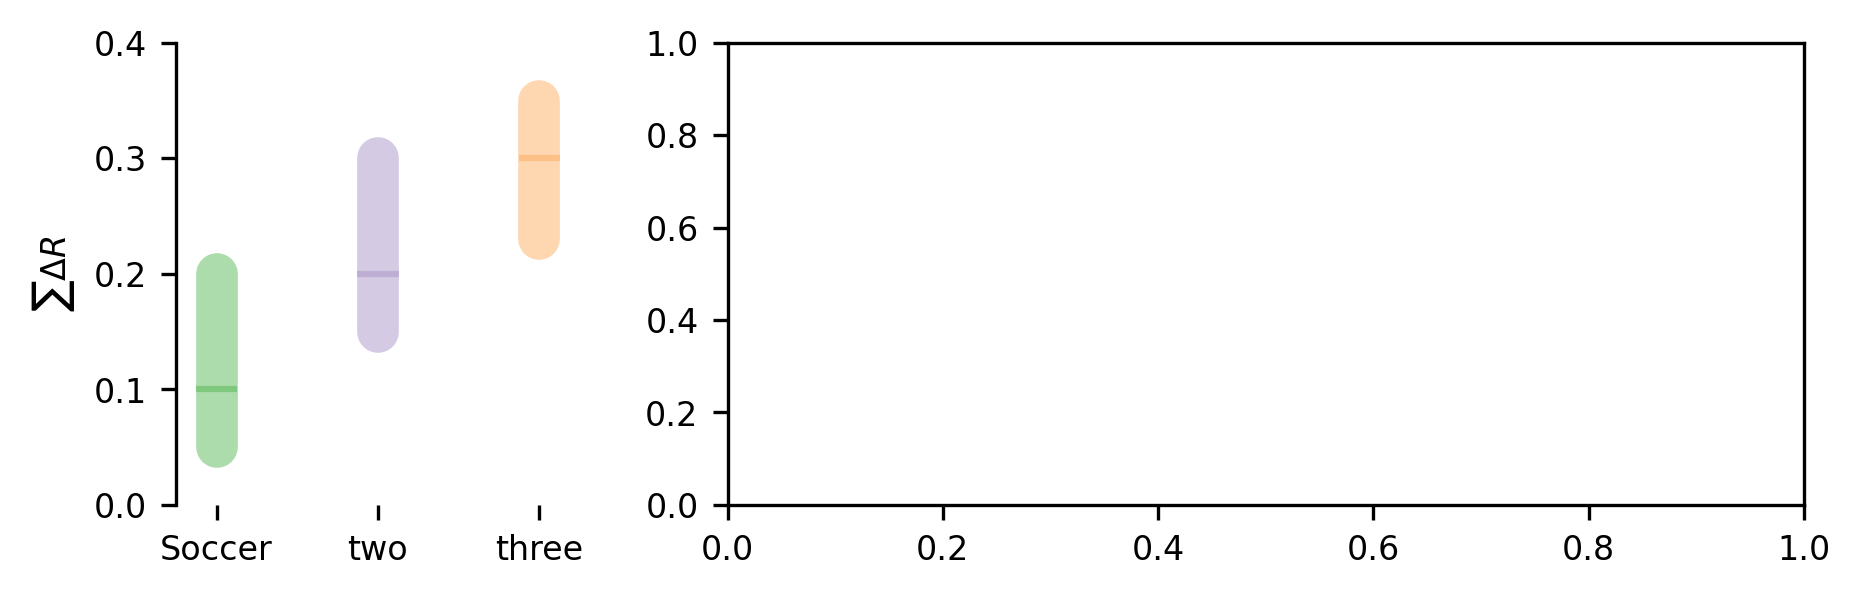

In [161]:

fig, axes = plt.subplots(1,2,figsize=(7,2.0),gridspec_kw={"width_ratios":[0.3,0.8,]})

# Colors
cmap = plt.get_cmap("Accent")
colors = [to_hex(cmap(i),keep_alpha=True) for i in range(len(y))]

# Plotting
lines = effect_mean(axes[0],models,addR_means,addR_errors,colors)

# Model plots
#for i,trace in enumerate(traces):
#    covid19_soccer.plot.timeseries.incidence(axes[1],trace,model,dl,color=colors[i])
    
fig.savefig(f"{fig_path}/what_if.pdf", **save_kwargs)
fig.savefig(f"{fig_path}/what_if.png", **save_kwargs)
plt.show()